# DSCI 503 - Homework 05
### DSCI 503 - Homework 05 Talaya Francois

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [2]:
np.random.seed(1)
Z = np.random.uniform(low=0, high=10, size=(5,8))
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
row3 = Z[2, :]
column6 = Z[:, 5]
print(f"Row 3: {str(row3):<}\nColumn 6: {str(column6):<}")

Row 3: [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: [0.92 8.78 9.68 8.78 8.35]


In [4]:
row_sums = np.sum(Z, axis=0)
column_sums = np.sum(Z, axis=1)
array_sum = np.sum(Z)
print(f"Row Sums: {row_sums}\nColumn Sums: {column_sums}\nArray Sum: {array_sum}")

Row Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Column Sums: [22.1  38.19 40.88 34.62 47.89]
Array Sum: 183.68


## Problem 2: Reshaping and Stacking Arrays 

In [5]:
np.random.seed(167)

x1 = np.random.normal(loc=50, scale=10, size=1000)
x2 = np.random.normal(loc=20, scale=50, size=1000)
x3 = np.random.normal(loc=100, scale=30, size=1000)
x4 = np.random.normal(loc=10, scale=2, size=1000)

x1_column = x1.reshape((1000, 1))
x2_column = x2.reshape((1000, 1))
x3_column = x3.reshape((1000, 1))
x4_column = x4.reshape((1000, 1))


X = np.hstack((x1_column, x2_column, x3_column, x4_column))
X = np.round(X, 2)
print(X.shape)


(1000, 4)


In [6]:
print(X[:6])

[[ 37.08 -12.91 138.06   8.89]
 [ 41.32  19.13  99.61   9.86]
 [ 63.15 -35.74  70.08  11.6 ]
 [ 50.03 -52.9   95.05   8.47]
 [ 55.05  63.97  62.16   9.49]
 [ 59.24  76.85  64.57  12.84]]


## Problem 3: Standardization

In [7]:
column_means = np.mean(X, axis=0)
column_stds = np.std(X, axis=0)

column_means = np.round(column_means, 2)
column_stds = np.round(column_stds, 2)

print(f"Column means: {column_means}\nColumn standard deviations: {column_stds}")

Column means: [50.21 18.6  99.84 10.06]
Column standard deviations: [ 9.69 50.79 30.88  2.03]


In [8]:
W = (X - column_means) / column_stds

W_means = np.mean(W, axis=0)
W_stds = np.std(W, axis=0)

W_means = np.round(W_means, 2)
W_stds = np.round(W_stds, 2)

print(f"Column means: {str(W_means):>31}\nColumn standard deviations: {W_stds}")

Column means:               [ 0.  0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset 


In [9]:
auto = pd.read_csv("auto_mpg.txt", sep="\t")
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print(auto.shape)

(398, 5)


In [11]:
auto_mean = auto.mean(numeric_only=True)
print(auto_mean)

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Problem 5: Regional Counts and Means 

In [12]:
regions = np.unique(auto["region"])
print(regions)

['asia' 'eur' 'usa']


In [13]:
asia_auto = auto[auto["region"] == "asia"]
eur_auto = auto[auto["region"] == "eur"]
usa_auto = auto[auto["region"] == "usa"]

asia_rows = len(asia_auto)
eur_rows = len(eur_auto)
usa_rows = len(usa_auto)

print(f"""Number of cars manufactured in Asia:    {asia_rows} 
Number of cars manufactured in Europe:  {eur_rows} 
Number of cars manufactured in USA:    {usa_rows} """)

Number of cars manufactured in Asia:    79 
Number of cars manufactured in Europe:  70 
Number of cars manufactured in USA:    249 


In [14]:
regions = ["asia", "eur", "usa"]

mean_dict = {
    "mpg": [asia_auto["mpg"].mean(), eur_auto["mpg"].mean(), usa_auto["mpg"].mean()],
    "cyl": [asia_auto["cyl"].mean(), eur_auto["cyl"].mean(), usa_auto["cyl"].mean()],
    "wt":  [asia_auto["wt"].mean(),  eur_auto["wt"].mean(),  usa_auto["wt"].mean()]
}

mean_df = pd.DataFrame(mean_dict, index=regions)
mean_df


,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region 


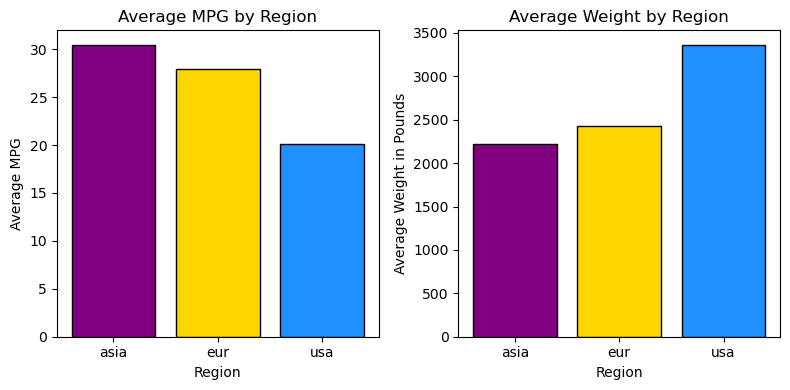

In [15]:
plt.figure(figsize=[8,4])

colors1 = ["purple", "gold", "dodgerblue"]

plt.subplot(1, 2, 1)
plt.bar(regions, mean_df["mpg"], color=colors1, edgecolor='black')
plt.title( "Average MPG by Region")
plt.ylabel("Average MPG")
plt.xlabel("Region")

plt.subplot(1, 2, 2)
plt.bar(regions, mean_df["wt"], color=colors1, edgecolor='black')
plt.title( "Average Weight by Region")
plt.ylabel("Average Weight in Pounds")
plt.xlabel("Region")

plt.tight_layout()
plt.show()


## Problem 7: Relationship between Weight and Miles Per Gallon 


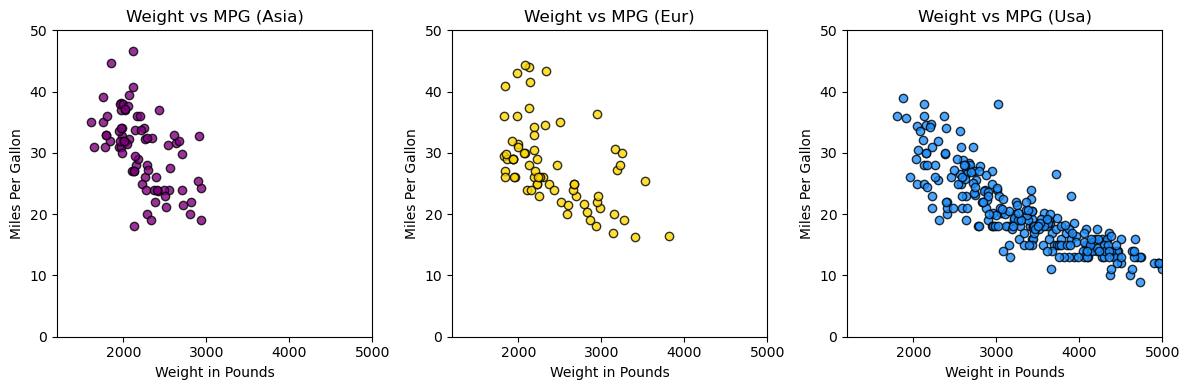

In [16]:
plt.figure(figsize=[12,4])

for i in range(len(regions)): 
    region = regions[i]
    color = colors1[i]
    region_data = auto[auto["region"] == region]
    plt.subplot(1, 3, i + 1)
    



    plt.scatter(region_data["wt"], region_data["mpg"],
                color=color, edgecolor='black', alpha=0.8)
    
   
    plt.xlim(1200, 5000)
    plt.ylim(0, 50)
    

    plt.xlabel("Weight in Pounds")
    plt.ylabel("Miles Per Gallon")
    
    
    plt.title(f"Weight vs MPG ({region.title()})")

plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region 


In [17]:
cyl_values = np.unique(auto["cyl"])
print(cyl_values)

[3 4 5 6 8]


In [18]:
cyl_column = auto["cyl"]
region_column = auto["region"]
cyl_counts_by_region = pd.crosstab(cyl_column, region_column)
cyl_counts_by_region 


region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


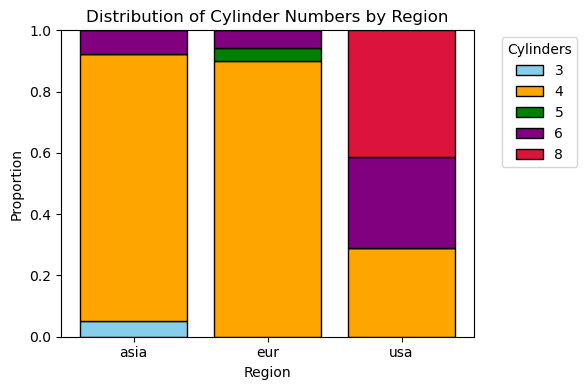

In [19]:
cyl_props_by_region = cyl_counts_by_region / cyl_counts_by_region.sum()
bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region
colors2 = ["skyblue", "orange", "green", "purple", "crimson"]

import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=[6, 4])

# Loop over rows (cylinder counts)
for i in range(len(cyl_props_by_region)):
    # Row data
    heights = cyl_props_by_region.iloc[i]
    bottoms = bar_bottoms.iloc[i]
    color = colors2[i]
    cyl_label = cyl_props_by_region.index[i]

    # Plot bar layer
    plt.bar(cyl_props_by_region.columns, heights, bottom=bottoms,              
            color=color, edgecolor='black', label=cyl_label)

plt.xlabel("Region")
plt.ylabel("Proportion")
plt.title("Distribution of Cylinder Numbers by Region")

plt.legend(title="Cylinders", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
